<a href="https://colab.research.google.com/github/martinmowns/Data-Science-Project/blob/main/Titanic_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

import string
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
def concat_df(train_data, test_data):
    return pd.concat([train_data, test_data], sort=True).reset_index(drop=True)

df_train = pd.read_csv('train (1).csv')
df_test = pd.read_csv('train (1).csv')
df_all = concat_df(df_train, df_test)

df_train.name = 'Training Set'
df_test.name = 'Test Set'
df_all.name = 'All Set' 

dfs = [df_train, df_test]

In [ ]:
print('Number of Training Examples = {}'.format(df_train.shape[0]))
print('Number of Test Examples = {}\n'.format(df_test.shape[0]))
print('Training X Shape = {}'.format(df_train.shape))
print('Training y Shape = {}\n'.format(df_train['Survived'].shape[0]))
print('Test X Shape = {}'.format(df_test.shape))
print('Test y Shape = {}\n'.format(df_test.shape[0]))
print(df_train.columns)
print(df_test.columns)

Number of Training Examples = 891
Number of Test Examples = 891

Training X Shape = (891, 12)
Training y Shape = 891

Test X Shape = (891, 12)
Test y Shape = 891

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df_train.info(memory_usage=False)
print(df_train.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7  

In [ ]:
df_train_corr = df_train.corr().abs()
print(df_train_corr.to_string())

             PassengerId  Survived    Pclass       Age     SibSp     Parch      Fare
PassengerId     1.000000  0.005007  0.035144  0.036847  0.057527  0.001652  0.012658
Survived        0.005007  1.000000  0.338481  0.077221  0.035322  0.081629  0.257307
Pclass          0.035144  0.338481  1.000000  0.369226  0.083081  0.018443  0.549500
Age             0.036847  0.077221  0.369226  1.000000  0.308247  0.189119  0.096067
SibSp           0.057527  0.035322  0.083081  0.308247  1.000000  0.414838  0.159651
Parch           0.001652  0.081629  0.018443  0.189119  0.414838  1.000000  0.216225
Fare            0.012658  0.257307  0.549500  0.096067  0.159651  0.216225  1.000000


In [ ]:
df_train.name = 'Training Set'
df_test.name = 'Test Set'
df_all.name = 'All Set' 

dfs = [df_train, df_test]

def display_missing(df):    
    for col in df.columns.tolist():          
        print('{} column missing values: {}'.format(col, df[col].isnull().sum()))
    print('\n')

for df in dfs:
    print('{}'.format(df.name))
    display_missing(df)

Training Set
PassengerId column missing values: 0
Survived column missing values: 0
Pclass column missing values: 0
Name column missing values: 0
Sex column missing values: 0
Age column missing values: 177
SibSp column missing values: 0
Parch column missing values: 0
Ticket column missing values: 0
Fare column missing values: 0
Cabin column missing values: 687
Embarked column missing values: 2


Test Set
PassengerId column missing values: 0
Survived column missing values: 0
Pclass column missing values: 0
Name column missing values: 0
Sex column missing values: 0
Age column missing values: 177
SibSp column missing values: 0
Parch column missing values: 0
Ticket column missing values: 0
Fare column missing values: 0
Cabin column missing values: 687
Embarked column missing values: 2




In [ ]:

age_by_pclass_sex = df_all.groupby(['Sex', 'Pclass']).median()['Age']

for pclass in range(1, 4):
    for sex in ['female', 'male']:
        print('Median age of Pclass {} {}s: {}'.format(pclass, sex, age_by_pclass_sex[sex][pclass]))
print('Median age of all passengers: {}'.format(df_all['Age'].median()))

df_all['Age'] = df_all.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))

Median age of Pclass 1 females: 35.0
Median age of Pclass 1 males: 40.0
Median age of Pclass 2 females: 28.0
Median age of Pclass 2 males: 30.0
Median age of Pclass 3 females: 21.5
Median age of Pclass 3 males: 25.0
Median age of all passengers: 28.0


In [ ]:
df_all['Embarked'] = df_all['Embarked'].fillna('S')

In [ ]:
med_fare = df_all.groupby(['Pclass', 'Parch', 'SibSp']).Fare.median()[3][0][0]
df_all['Fare'] = df_all['Fare'].fillna(med_fare)

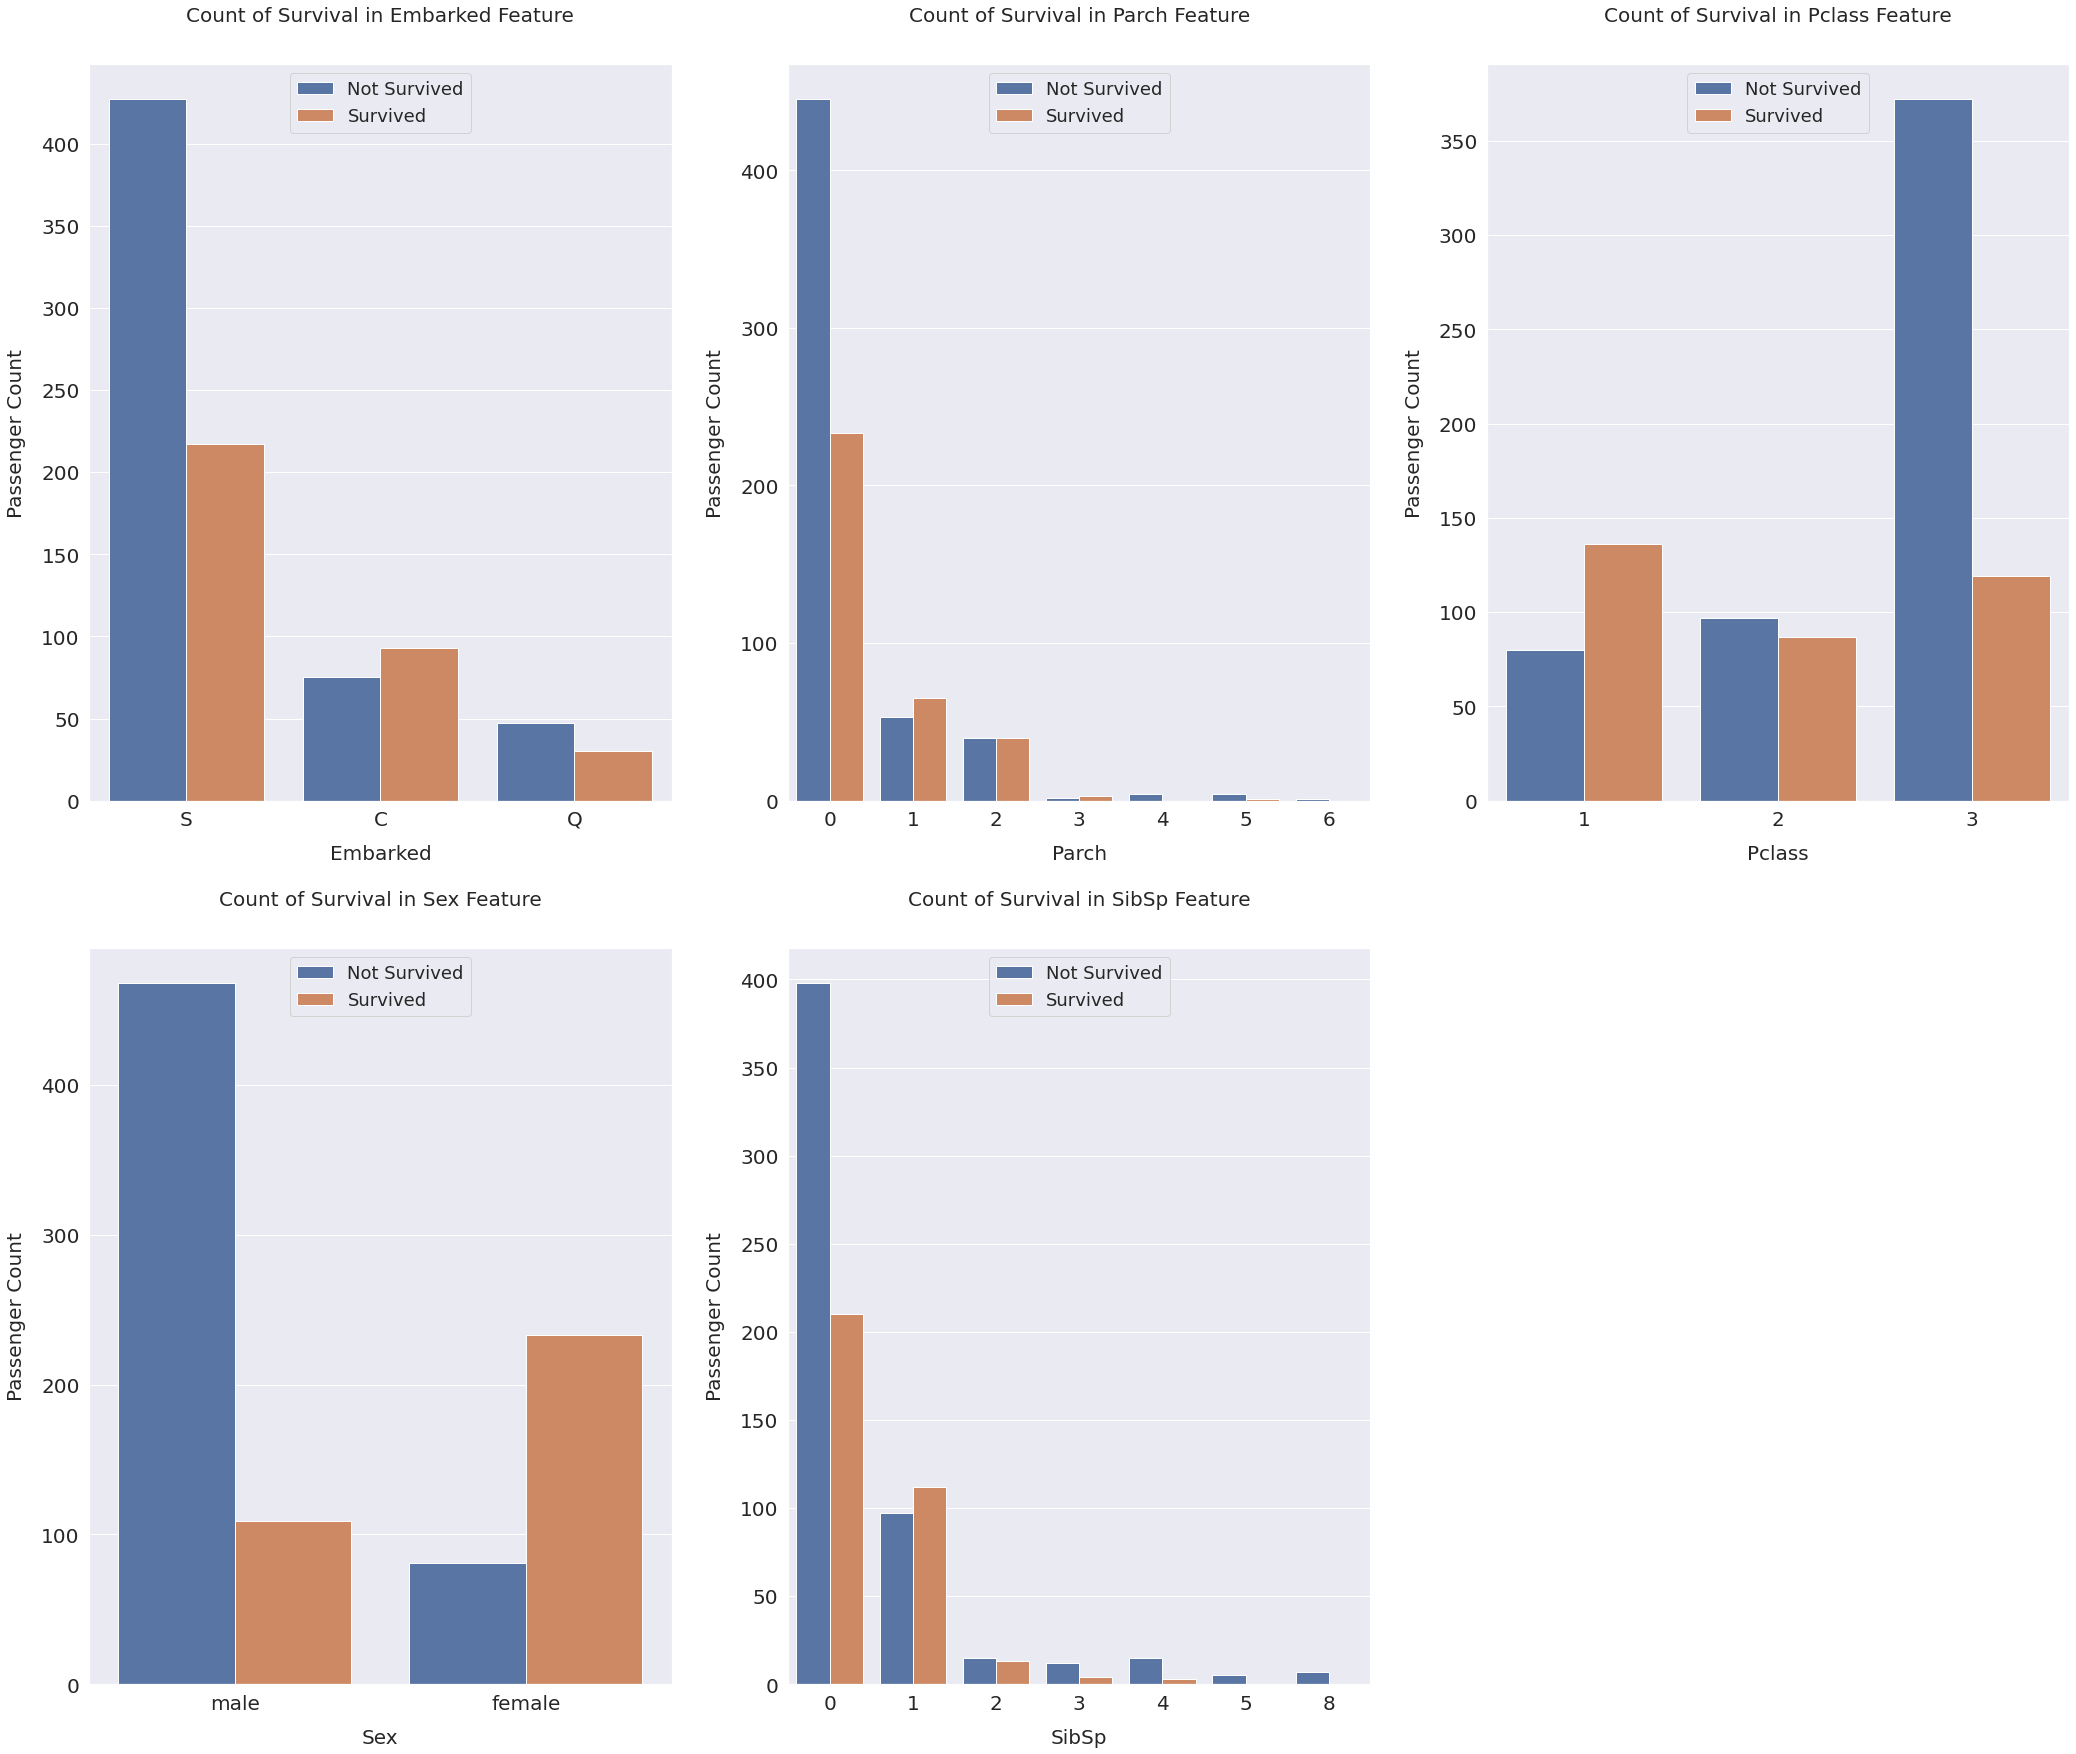

In [ ]:
cat_features = ['Embarked', 'Parch', 'Pclass', 'Sex', 'SibSp']

fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(20, 20))
plt.subplots_adjust(right=1.5, top=1.25)

for i, feature in enumerate(cat_features, 1):    
    plt.subplot(2, 3, i)
    sns.countplot(x=feature, hue='Survived', data=df_train)
    
    plt.xlabel('{}'.format(feature), size=20, labelpad=15)
    plt.ylabel('Passenger Count', size=20, labelpad=15)    
    plt.tick_params(axis='x', labelsize=20)
    plt.tick_params(axis='y', labelsize=20)
    
    plt.legend(['Not Survived', 'Survived'], loc='upper center', prop={'size': 18})
    plt.title('Count of Survival in {} Feature'.format(feature), size=20, y=1.05)

plt.show()

Dari plot yang dihasikan, ternyata penumpang yang berangkat dari Cherbourg lebih banyak yang selamat, sedangkan penumpang dari Southampton, hanya setengahnya yang selamat.

Untuk orang yang membawa hanya 1 Parent/Children, lebih banyak yang selamat.

Untuk orang dengan Kelas Penumpang 1, kemungkinan selamatnya jauh lebih tinggi. Dan penumpang dengan Kelas Penumpang 3 hanya sedikit yang selamat.

Dan Orang yang membawa 1 Sibling/Spouse kemungkinan selamatnya jauh lebih besar.

Orang yang membawa 2 Sibling/Spouse kemungkinan selamatnya cukup kecil.

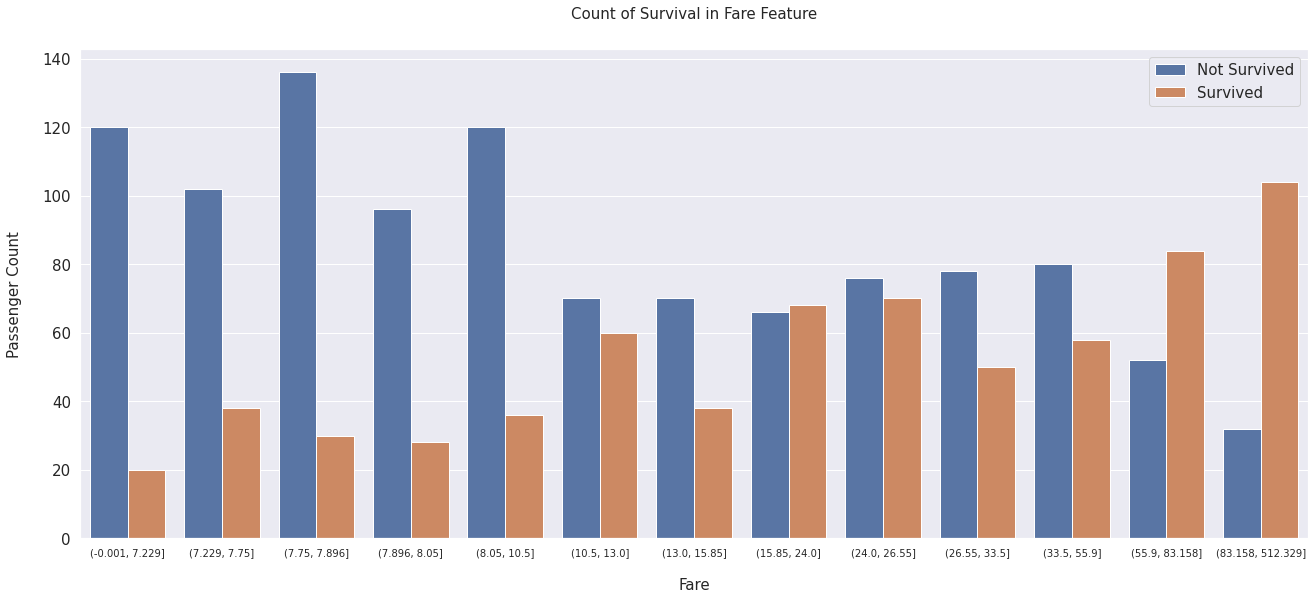

In [ ]:

df_all['Fare'] = pd.qcut(df_all['Fare'], 13)

fig, axs = plt.subplots(figsize=(22, 9))
sns.countplot(x='Fare', hue='Survived', data=df_all)

plt.xlabel('Fare', size=15, labelpad=20)
plt.ylabel('Passenger Count', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=15)

plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 15})
plt.title('Count of Survival in {} Feature'.format('Fare'), size=15, y=1.05)

plt.show()

Minimal usia yang ada adalah 0.17 tahun dan yang tertua adalah 80 tahun. Sehingga membaginya dengan 13 kelompok quantile cukup.

Dan untuk Fare termurah adalah 0 dan termahal adalah 512. Sehingga membaginya dengan 10 kelompok quantile cukup.

Perintah yang pertama bermaksud untuk membagi Fare menjadi 13 bagian dengan fungsi qcut().

Dan perintah yang kedua adalah untuk menggambarkan plot group usia terhadap tingkat keselamatan.

Dapat dilihat bahwa semakin mahal harga tiketnya, semakin besar kemungkinan orang itu selamat, dimulai dari harga 56 ke atas.

Tetapi banyak orang yang selamat dimulai dari 10.5 sudah cukup meningkat, kecuali kejadian yang terjadi pada kelompok pemegang tiket berharga 13-15.742.

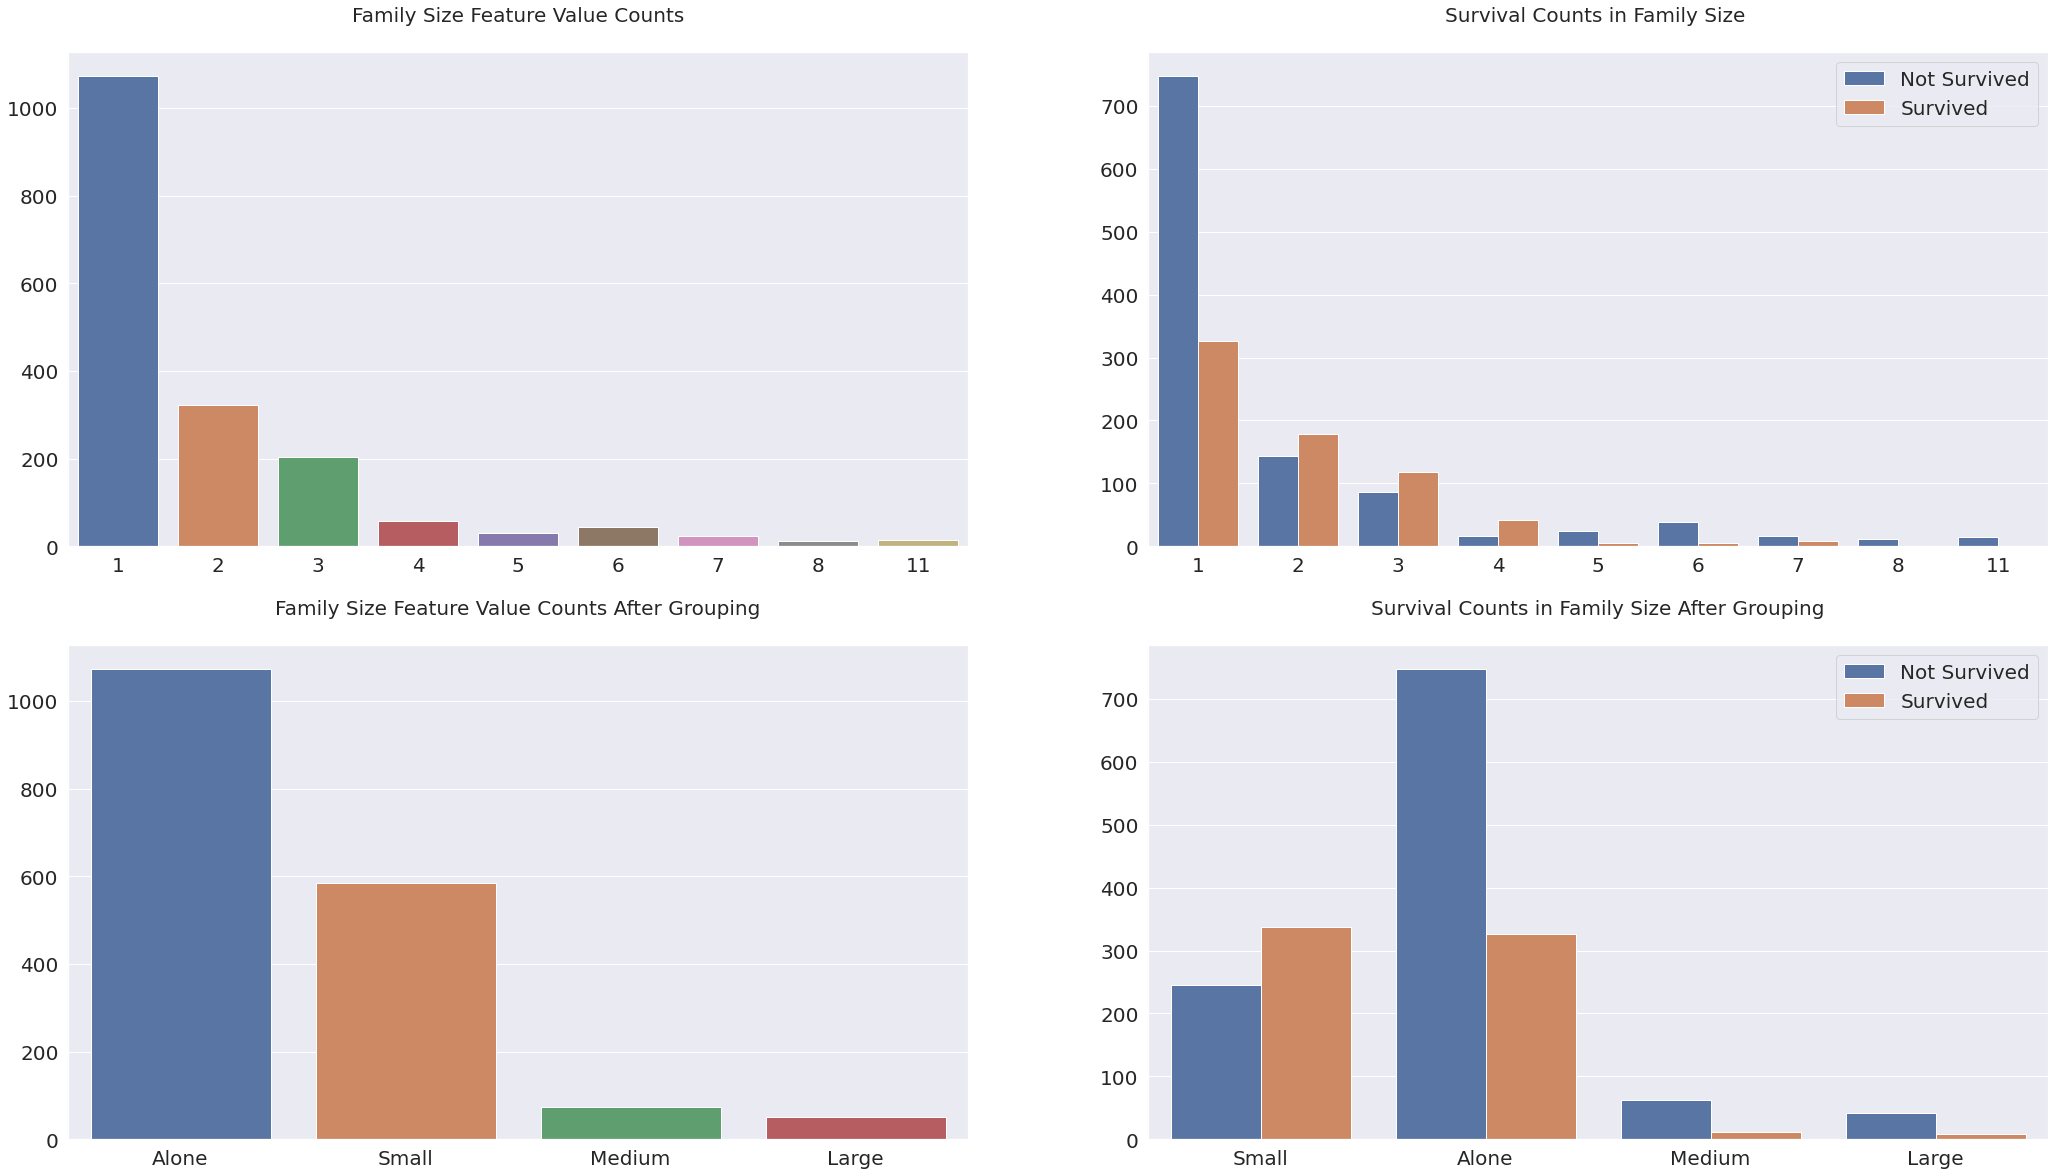

In [ ]:
import matplotlib.pyplot as plt
df_all['Family_Size'] = df_all['SibSp'] + df_all['Parch'] + 1

fig, axs = plt.subplots(figsize=(20, 20), ncols=2, nrows=2)
plt.subplots_adjust(right=1.5)

sns.barplot(x=df_all['Family_Size'].value_counts().index, y=df_all['Family_Size'].value_counts().values, ax=axs[0][0])
sns.countplot(x='Family_Size', hue='Survived', data=df_all, ax=axs[0][1])

axs[0][0].set_title('Family Size Feature Value Counts', size=20, y=1.05)
axs[0][1].set_title('Survival Counts in Family Size ', size=20, y=1.05)

family_map = {1: 'Alone', 2: 'Small', 3: 'Small', 4: 'Small', 5: 'Medium', 6: 'Medium', 7: 'Large', 8: 'Large', 11: 'Large'}
df_all['Family_Size_Grouped'] = df_all['Family_Size'].map(family_map)

sns.barplot(x=df_all['Family_Size_Grouped'].value_counts().index, y=df_all['Family_Size_Grouped'].value_counts().values, ax=axs[1][0])
sns.countplot(x='Family_Size_Grouped', hue='Survived', data=df_all, ax=axs[1][1])

axs[1][0].set_title('Family Size Feature Value Counts After Grouping', size=20, y=1.05)
axs[1][1].set_title('Survival Counts in Family Size After Grouping', size=20, y=1.05)

for i in range(2):
    axs[i][1].legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 20})
    for j in range(2):
        axs[i][j].tick_params(axis='x', labelsize=20)
        axs[i][j].tick_params(axis='y', labelsize=20)
        axs[i][j].set_xlabel('')
        axs[i][j].set_ylabel('')

plt.show()

Pada plot menjelaskan bahwa orang dengan Family_Size 2,3,4 mempunyai kemungkinan selamat lebih besar, selebihnya kemungkinannya menurun dan orang yang pergi dengan Family_Size_Grouped Small lebih terlihat mempunyai tingkat keselamatan lebih besar.

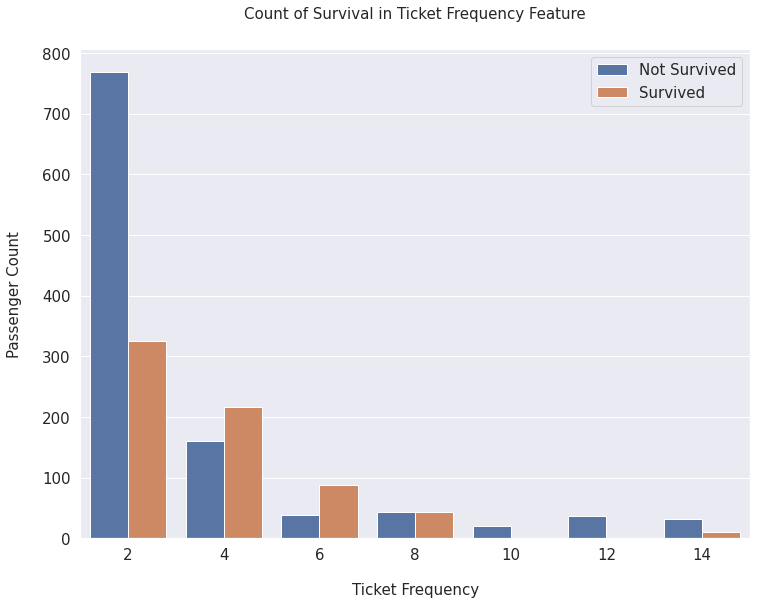

In [ ]:
import matplotlib.pyplot as plt
df_all['Ticket_Frequency'] = df_all.groupby('Ticket')['Ticket'].transform('count')

fig, axs = plt.subplots(figsize=(12, 9))
sns.countplot(x='Ticket_Frequency', hue='Survived', data=df_all)

plt.xlabel('Ticket Frequency', size=15, labelpad=20)
plt.ylabel('Passenger Count', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)

plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 15})
plt.title('Count of Survival in {} Feature'.format('Ticket Frequency'), size=15, y=1.05)

plt.show()

Pada hasil plot penjelasannya feature Family_Size_Grouped, di angka 2,3,4 kemungkinan tingkat selamatnya meningkat.


In [ ]:

df_all['Title'] = df_all['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]

print(df_all['Title'].unique())

df_all['Is_Married'] = 0
df_all['Is_Married'].loc[df_all['Title'] == 'Mrs'] = 1

print(df_all['Title'].unique())

['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'the Countess' 'Jonkheer']
['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'the Countess' 'Jonkheer']


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


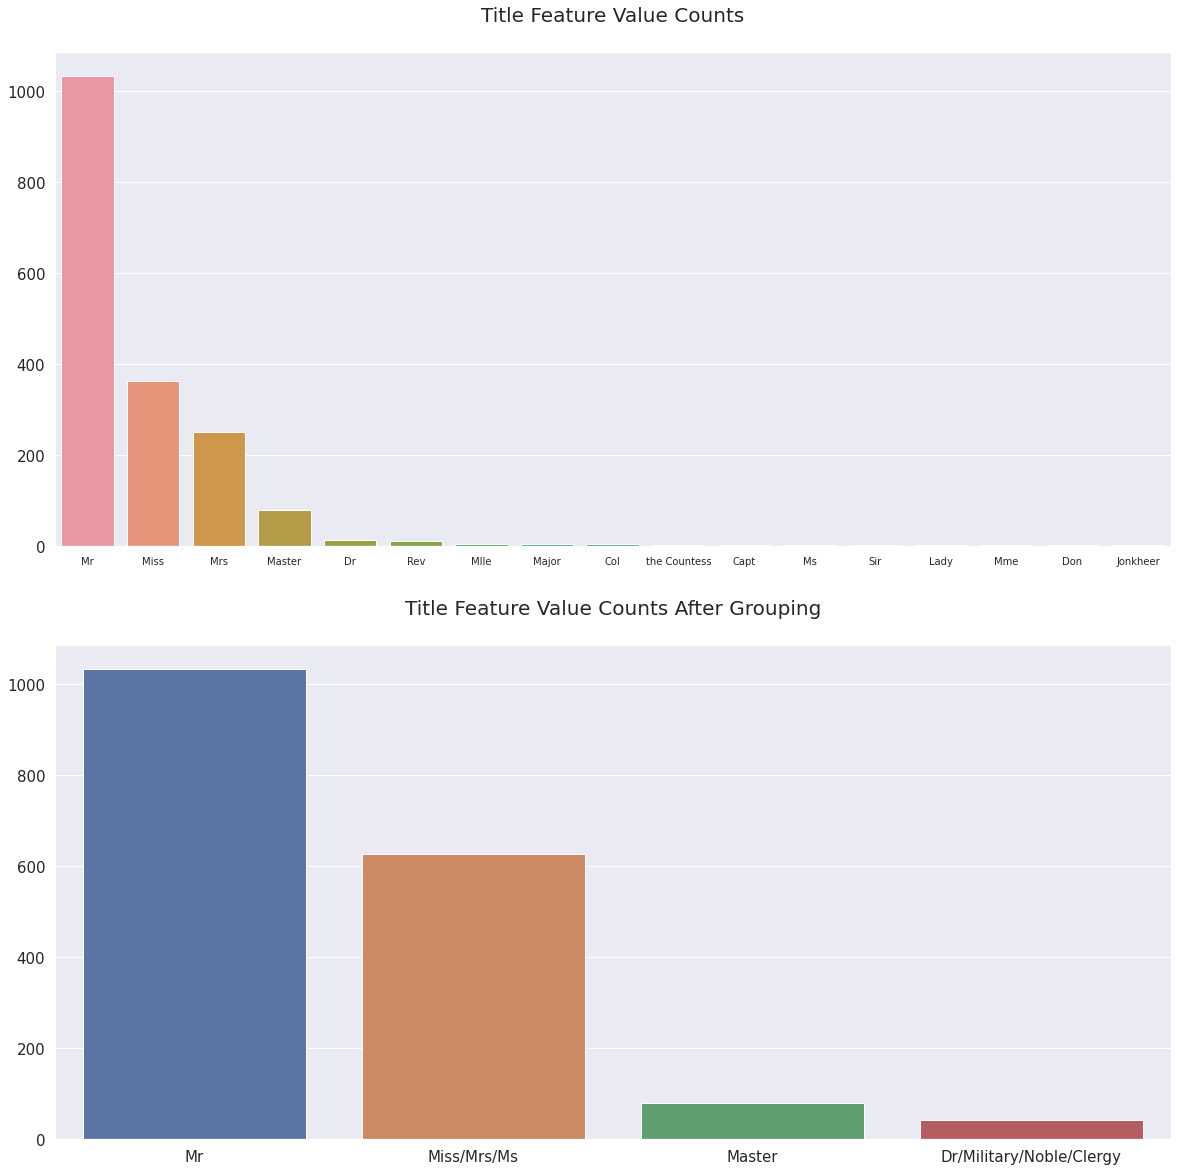

In [ ]:
fig, axs = plt.subplots(nrows=2, figsize=(20, 20))
sns.barplot(x=df_all['Title'].value_counts().index, y=df_all['Title'].value_counts().values, ax=axs[0])

axs[0].tick_params(axis='x', labelsize=10)
axs[1].tick_params(axis='x', labelsize=15)

for i in range(2):    
    axs[i].tick_params(axis='y', labelsize=15)

axs[0].set_title('Title Feature Value Counts', size=20, y=1.05)

df_all['Title'] = df_all['Title'].replace(['Miss', 'Mrs','Ms', 'Mlle', 'Lady', 'Mme', 'the Countess', 'Dona'], 'Miss/Mrs/Ms')
df_all['Title'] = df_all['Title'].replace(['Dr', 'Col', 'Major', 'Jonkheer', 'Capt', 'Sir', 'Don', 'Rev'], 'Dr/Military/Noble/Clergy')

sns.barplot(x=df_all['Title'].value_counts().index, y=df_all['Title'].value_counts().values, ax=axs[1])
axs[1].set_title('Title Feature Value Counts After Grouping', size=20, y=1.05)

plt.show()

Nama orang yang ada di dataset ini, semuanya mempunyai pola yang sama, yaitu:

[Nama_belakang], [Jabatan]. [Nama_depan]
sehingga mengambil jabatannya saja dengan mengambil kata setelah "," (koma) dan sebelum "." (titik). Fungsi .split() akan membagi kalimat menjadi beberapa kata dengan keyword tertentu, dan dapat diambil dengan index [ ]

Gantilah bagian [...1...] untuk menghasilkan seperti di bawah ini:

[Braund, Mr. , Owen Harris]
Lalu fungsi lakukan split untuk bagian kedua yang akan menghasilkan:

[Mr, Owen Harris]
Lalu ambil index 0 alias yang pertama sehingga akan mendapatkan Mr

Dari sini bisa membuat fitur baru dengan nama ‘Title’ yang berisi jabatan seseorang.

Jabatan yang paling umum di sini adalah Mr, Mrs. , dan Miss.

Sehingga bisa mengetahui status menikah seseorang dari Mrs.

Kita bisa membuat fitur baru lagi yaitu ‘Is_Married’

Fitur ini adalah jika seseorang mempunyai jabatan ‘Mrs’ , berarti dia sudah menikah.

Lalu buat grafik plot nya

Setelah melakukan df_all[‘Title’].unique()

Ternyata ada banyak sekali jabatan lain, dan mengelompokkannya menjadi satu pada konten berikutnya

['Miss', 'Mrs','Ms', 'Mlle', 'Lady', 'Mme', 'the Countess', 'Dona'] akan diubah menjadi 'Miss/Mrs/Ms'

['Dr', 'Col', 'Major', 'Jonkheer', 'Capt', 'Sir', 'Don', 'Rev'] menjadi 'Dr/Military/Noble/Clergy'

In [ ]:
df_all['Title'] = df_all['Title'].replace(['Miss', 'Mrs','Ms', 'Mlle', 'Lady', 'Mme', 'the Countess', 'Dona'], 'Miss/Mrs/Ms')
df_all['Title'] = df_all['Title'].replace(['Dr', 'Col', 'Major', 'Jonkheer', 'Capt', 'Sir', 'Don', 'Rev'], 'Dr/Military/Noble/Clergy')

Bagian ini adalah bagian mengubah ['Miss', 'Mrs','Ms', 'Mlle', 'Lady', 'Mme', 'the Countess', 'Dona'] akan kita ubah menjadi 'Miss/Mrs/Ms' ['Dr', 'Col', 'Major', 'Jonkheer', 'Capt', 'Sir', 'Don', 'Rev'] menjadi 'Dr/Military/Noble/Clergy'

In [ ]:
print(df_all.head())

    Age Cabin Embarked            Fare  \
0  22.0   NaN        S   (7.229, 7.75]   
1  38.0   C85        C  (55.9, 83.158]   
2  26.0   NaN        S   (7.896, 8.05]   
3  35.0  C123        S    (33.5, 55.9]   
4  35.0   NaN        S   (7.896, 8.05]   

                                                Name  Parch  PassengerId  \
0                            Braund, Mr. Owen Harris      0            1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...      0            2   
2                             Heikkinen, Miss. Laina      0            3   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)      0            4   
4                           Allen, Mr. William Henry      0            5   

   Pclass     Sex  SibSp  Survived            Ticket  Family_Size  \
0       3    male      1         0         A/5 21171            2   
1       1  female      1         1          PC 17599            2   
2       3  female      0         1  STON/O2. 3101282            1   
3       1  fem

In [ ]:
df_train = df_all.loc[:890]
df_test = df_all.loc[891:]
dfs = [df_train, df_test]

In [ ]:
non_numeric_features = ['Embarked', 'Sex', 'Title', 'Family_Size_Grouped', 'Age', 'Fare']

for df in dfs:
    for feature in non_numeric_features:        
        df[feature] = LabelEncoder().fit_transform(df[feature])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
cat_features = ['Pclass', 'Sex', 'Embarked', 'Title', 'Family_Size_Grouped']
encoded_features = []

for df in dfs:
    for feature in cat_features:
        encoded_feat = OneHotEncoder().fit_transform(df[feature].values.reshape(-1, 1)).toarray()
        n = df[feature].nunique()
        cols = ['{}_{}'.format(feature, n) for n in range(1, n + 1)]
        encoded_df = pd.DataFrame(encoded_feat, columns=cols)
        encoded_df.index = df.index
        encoded_features.append(encoded_df)

df_train = pd.concat([df_train, *encoded_features[:5]], axis=1)
df_test = pd.concat([df_test, *encoded_features[5:]], axis=1)

In [ ]:
df_all = concat_df(df_train, df_test)
drop_cols = ['Cabin', 'Embarked', 'Family_Size', 'Family_Size_Grouped', 'Survived',
'Name', 'PassengerId', 'Pclass', 'Sex', 'Ticket', 'Title']
df_all.drop(columns=drop_cols, inplace=True)
print(df_all.head())

   Age  Embarked_1  Embarked_2  Embarked_3  Family_Size_Grouped_1  \
0   29         0.0         0.0         1.0                    0.0   
1   52         1.0         0.0         0.0                    0.0   
2   35         0.0         0.0         1.0                    1.0   
3   48         0.0         0.0         1.0                    0.0   
4   48         0.0         0.0         1.0                    1.0   

   Family_Size_Grouped_2  Family_Size_Grouped_3  Family_Size_Grouped_4  Fare  \
0                    0.0                    0.0                    1.0     1   
1                    0.0                    0.0                    1.0    11   
2                    0.0                    0.0                    0.0     3   
3                    0.0                    0.0                    1.0    10   
4                    0.0                    0.0                    0.0     3   

   Is_Married  ...  Pclass_2  Pclass_3  Sex_1  Sex_2  SibSp  Ticket_Frequency  \
0           0  ...     

In [ ]:
X_train = StandardScaler().fit_transform(df_train.drop(columns=drop_cols))
y_train = df_train['Survived'].values
X_test = StandardScaler().fit_transform(df_test.drop(columns=drop_cols))

print('X_train shape: {}'.format(X_train.shape))
print('y_train shape: {}'.format(y_train.shape))
print('X_test shape: {}'.format(X_test.shape))

X_train shape: (891, 22)
y_train shape: (891,)
X_test shape: (891, 22)


In [ ]:
random_forest = RandomForestClassifier(criterion='gini', 
                                           n_estimators=1100,
                                           max_depth=5,
                                           min_samples_split=4,
                                           min_samples_leaf=5,
                                           max_features='auto',
                                           oob_score=True,
                                           random_state=50)
random_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=4,
                       n_estimators=1100, oob_score=True, random_state=50)

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(random_forest, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.83333333 0.87640449 0.7752809  0.87640449 0.84269663 0.80898876
 0.82022472 0.78651685 0.87640449 0.85393258]
Mean: 0.8350187265917602
Standard Deviation: 0.0351785892234905


In [ ]:
df.head(10)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Family_Size,Family_Size_Grouped,Ticket_Frequency,Title,Is_Married
891,29,NaN,2,1,"Braund, Mr. Owen Harris",0,1,3,1,1,0,A/5 21171,2,3,2,3,0
892,52,C85,0,11,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,1,1,PC 17599,2,3,2,2,1
893,35,NaN,2,3,"Heikkinen, Miss. Laina",0,3,3,0,0,1,STON/O2. 3101282,1,0,2,2,0
894,48,C123,2,10,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,0,1,1,113803,2,3,4,2,1
895,48,NaN,2,3,"Allen, Mr. William Henry",0,5,3,1,0,0,373450,1,0,2,3,0
896,34,NaN,1,4,"Moran, Mr. James",0,6,3,1,0,0,330877,1,0,2,3,0
897,70,E46,2,10,"McCarthy, Mr. Timothy J",0,7,1,1,0,0,17463,1,0,2,3,0
898,6,NaN,2,7,"Palsson, Master. Gosta Leonard",1,8,3,1,3,0,349909,5,2,8,1,0
899,36,NaN,2,5,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,0,0,1,347742,3,3,6,2,1
900,18,NaN,0,9,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,0,1,1,237736,2,3,4,2,1


In [ ]:
df.sample(10)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Family_Size,Family_Size_Grouped,Ticket_Frequency,Title,Is_Married
960,35,NaN,2,4,"Kink, Mr. Vincenz",0,70,3,1,2,0,315151,3,3,2,3,0
1545,23,NaN,1,0,"Hegarty, Miss. Hanora ""Nora""",0,655,3,0,0,0,365226,1,0,2,2,0
1031,28,NaN,0,6,"Boulos, Mrs. Joseph (Sultana)",2,141,3,0,0,0,2678,3,3,4,2,1
1401,39,NaN,1,1,"Daly, Mr. Eugene Patrick",0,511,3,1,0,1,382651,1,0,2,3,0
1358,73,NaN,2,8,"Smart, Mr. John Montgomery",0,468,1,1,0,0,113792,1,0,2,3,0
1060,37,NaN,2,11,"Ling, Mr. Lee",0,170,3,1,0,0,1601,1,0,14,3,0
941,11,NaN,2,10,"Panula, Master. Juha Niilo",1,51,3,1,4,0,3101295,6,2,12,1,0
1044,55,NaN,2,6,"van Billiard, Mr. Austin Blyler",2,154,3,1,0,0,A/5. 851,3,3,2,3,0
1248,52,NaN,2,5,"Funk, Miss. Annie Clemmer",0,358,2,0,0,0,237671,1,0,2,2,0
1582,8,NaN,0,6,"Karun, Miss. Manca",1,692,3,0,0,1,349256,2,3,2,2,0
